In [63]:
import pandas as pd
import numpy as np
import glob
import os
import geopandas as gpd
import urllib
import sys
import pathlib
import glob
import matplotlib.pyplot as plt
from urllib.parse import quote
from sqlalchemy import create_engine
import configparser
import requests

import statsmodels.api as sm
#import pingouin as pg

import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


from fluxdataqaqc import Data, QaQc, Plot
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models.formatters import DatetimeTickFormatter
from bokeh.models import LinearAxis, Range1d
from bokeh.io import output_notebook
output_notebook()


Loading BokehJS ...

In [64]:
sys.path.append("../../src/")
from micromet import AmerifluxDataProcessor
#from tests.ffp_tests import footprint_config

In [65]:
config = configparser.ConfigParser()

config.read('../../secrets/config.ini')

from sqlalchemy import create_engine
import urllib.parse
host = config['DEFAULT']['ip']
pw = config['DEFAULT']['pw']
user = config['DEFAULT']['login']

encoded_password = urllib.parse.quote_plus(pw)

def postconn_et(encoded_password, host='localhost',user='postgres',port='5432',db='groundwater', schema = 'groundwater'):
    connection_text = "postgresql+psycopg2://{:}:{:}@{:}:{:}/{:}?gssencmode=disable".format(user,encoded_password,host,port,db)
    return create_engine(connection_text, connect_args={'options': '-csearch_path={}'.format(schema)})


engine = postconn_et(encoded_password, host=host, user=user)

In [67]:
sql = "SELECT * from groundwater.micromet_merged_view where stationid='US-UTD'"
df = pd.read_sql(sql, engine, )#index_col='datetime_start', parse_dates=True).replace(-9999, np.nan)
df

,timestamp_start,timestamp_end,stationid,co2,co2_sigma,h2o,h2o_sigma,fc,fc_ssitc_test,le,...,sw_in_1_1_3,ta_1_3_2,rh_1_3_2,le_1_1_2,h_1_1_2,vpd_1_1_2,pa_1_1_2,ta_1_1_2,rh_1_1_2,d_snow
0,202305242200,202305242230,US-UTD,-9999.0000,-9999.000000,-9999.000000,-9999.000000,-9999.00000,2,-9999.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202305250530,202305250600,US-UTD,-9999.0000,-9999.000000,-9999.000000,-9999.000000,-9999.00000,2,-9999.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202305250900,202305250930,US-UTD,415.9382,9.037321,8.796114,2.321862,-31.68816,2,356.3522,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,202305251000,202305251030,US-UTD,416.4627,7.869878,8.659901,2.039789,-25.71973,2,308.9352,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202305271500,202305271530,US-UTD,348.8136,7.959891,3.582950,1.950525,-19.70452,0,325.2126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31487,202306240900,202306240930,US-UTD,-9999.0000,-9999.000000,-9999.000000,-9999.000000,-9999.00000,2,-9999.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31488,202306241000,202306241030,US-UTD,-9999.0000,-9999.000000,-9999.000000,-9999.000000,-9999.00000,2,-9999.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31489,202306242030,202306242100,US-UTD,-9999.0000,-9999.000000,-9999.000000,-9999.000000,-9999.00000,2,-9999.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31490,202306261030,202306261100,US-UTD,-9999.0000,-9999.000000,-9999.000000,-9999.000000,-9999.00000,2,-9999.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
for col in df.columns:
    print(col)

stationid
timestamp_start
timestamp_end
alb_1_1_2
netrad_1_1_2
sw_in_1_1_2
sw_out_1_1_2
lw_in_1_1_2
lw_out_1_1_2
t_canopy
t_si111_body
ppfd_in
swc_3_1_1
k_3_1_1
ts_3_1_1
ec_3_1_1
swc_3_2_1
k_3_2_1
ts_3_2_1
ec_3_2_1
swc_3_3_1
k_3_3_1
ts_3_3_1
ec_3_3_1
swc_3_4_1
k_3_4_1
ts_3_4_1
ec_3_4_1
swc_3_5_1
k_3_5_1
ts_3_5_1
ec_3_5_1
swc_3_6_1
k_3_6_1
ts_3_6_1
ec_3_6_1
swc_3_7_1
k_3_7_1
ts_3_7_1
ec_3_7_1
swc_3_8_1
k_3_8_1
ts_3_8_1
ec_3_8_1
swc_3_9_1
k_3_9_1
ts_3_9_1
ec_3_9_1
ws
wd
lwmv_1_1_1
lwmdry_1_1_1
lwmcon_1_1_1
lwmwet_1_1_1
lwmv_1_1_2
lwmdry_1_1_2
lwmcon_1_1_2
lwmwet_1_1_2
file_no
datalogger_no
t_3_5_1
g_3_1_1
leaf_wet_1_1_1
leaf_wet_1_2_1
lvl_ft
lvlout_ft
water_temp_c
t__2_8_1
wtd
swc_4_1_1
k_4_1_1
ts_4_1_1
ec_4_1_1
swc_4_2_1
k_4_2_1
ts_4_2_1
ec_4_2_1
swc_4_3_1
k_4_3_1
ts_4_3_1
ec_4_3_1
swc_4_4_1
k_4_4_1
ts_4_4_1
ec_4_4_1
swc_4_5_1
k_4_5_1
ts_4_5_1
ec_4_5_1
swc_4_6_1
k_4_6_1
ts_4_6_1
ec_4_6_1
swc_4_7_1
k_4_7_1
ts_4_7_1
ec_4_7_1
swc_4_8_1
k_4_8_1
ts_4_8_1
ec_4_8_1
swc_4_9_1
k_4_9_1
ts_4_9_1
e

In [28]:
df['netrad_1_1_2'].max()

np.float64(807.9786)

DOY: 365, Hour: 14
Estimated Net Radiation Range: 65.3 W/m² to 396.8 W/m²


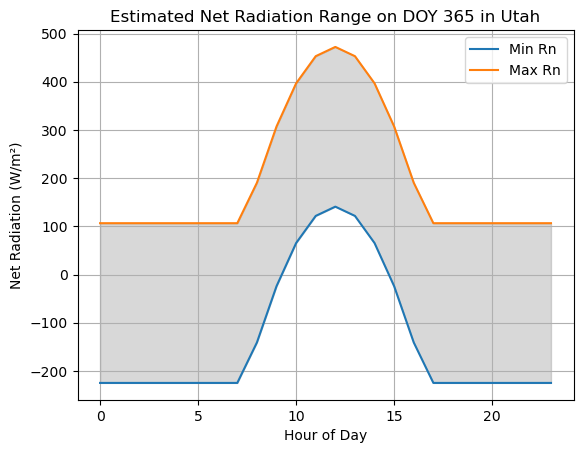

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from math import sin, cos, radians, pi, asin

# Constants
SOLAR_CONSTANT = 1367  # W/m²
ALBEDO = 0.25          # average for natural terrain
EMISSIVITY = 0.98      # ground emissivity
STEFAN_BOLTZMANN = 5.67e-8  # W/m²/K⁴
LATITUDE = 39.5  # Utah average latitude in degrees

def solar_declination(doy):
    """Return solar declination angle in radians for a given day of year."""
    return radians(23.44) * sin(2 * pi * (284 + doy) / 365)

def hour_angle(hour):
    """Return hour angle in radians."""
    return radians(15 * (hour - 12))

def solar_elevation(doy, hour, latitude=LATITUDE):
    """Return solar elevation angle in degrees."""
    decl = solar_declination(doy)
    lat_rad = radians(latitude)
    ha = hour_angle(hour)

    sin_elev = sin(lat_rad) * sin(decl) + cos(lat_rad) * cos(decl) * cos(ha)
    return max(0, asin(sin_elev))  # radians

def clear_sky_radiation(doy, hour, latitude=LATITUDE):
    """Estimate incoming shortwave radiation under clear-sky conditions."""
    elev_rad = solar_elevation(doy, hour, latitude)
    if elev_rad <= 0:
        return 0.0

    d_r = 1 + 0.033 * cos(2 * pi * doy / 365)  # Earth-Sun distance factor
    cos_zenith = cos(pi/2 - elev_rad)
    rs = SOLAR_CONSTANT * d_r * cos_zenith * 0.75  # ~0.75 = clear sky transmissivity
    return rs

def longwave_radiation(T_kelvin):
    """Estimate longwave radiation using Stefan-Boltzmann law."""
    return EMISSIVITY * STEFAN_BOLTZMANN * T_kelvin**4

def estimate_net_radiation_range(doy, hour):
    """Estimate min/max net radiation for given hour and DOY in Utah."""
    rs_down = clear_sky_radiation(doy, hour)

    # Net shortwave
    rs_net = rs_down * (1 - ALBEDO)

    # Assume typical diurnal surface temperature range in K
    Tmin_K = 273.15 + 5   # typical min in early morning
    Tmax_K = 273.15 + 40  # hot afternoon summer temp

    # Incoming longwave (simplified as ~cloudless sky)
    lw_down_min = longwave_radiation(Tmin_K - 5)  # colder sky at night
    lw_down_max = longwave_radiation(Tmax_K - 15) # warmer sky in afternoon

    # Outgoing longwave from surface
    lw_up_min = longwave_radiation(Tmin_K)
    lw_up_max = longwave_radiation(Tmax_K)

    # Net radiation range
    Rn_min = rs_net + lw_down_min - lw_up_max
    Rn_max = rs_net + lw_down_max - lw_up_min

    return Rn_min, Rn_max

# Example usage
doy = 365  # summer solstice ~June 21
hour = 14  # 2 PM

Rn_min, Rn_max = estimate_net_radiation_range(doy, hour)
print(f"DOY: {doy}, Hour: {hour}")
print(f"Estimated Net Radiation Range: {Rn_min:.1f} W/m² to {Rn_max:.1f} W/m²")

# Optional: Plotting diurnal range
hours = np.arange(0, 24)
rn_min_list, rn_max_list = zip(*[estimate_net_radiation_range(doy, h) for h in hours])

plt.plot(hours, rn_min_list, label="Min Rn")
plt.plot(hours, rn_max_list, label="Max Rn")
plt.fill_between(hours, rn_min_list, rn_max_list, color='gray', alpha=0.3)
plt.title(f"Estimated Net Radiation Range on DOY {doy} in Utah")
plt.xlabel("Hour of Day")
plt.ylabel("Net Radiation (W/m²)")
plt.legend()
plt.grid(True)
plt.show()


In [62]:
sql = "SELECT * from groundwater.micromet_met where stationid='US-UTD'"
df = pd.read_sql(sql, engine, index_col='datetime_start', parse_dates=True).replace(-9999, np.nan)

col = 'netrad_1_1_2'

doy = 160

Rn_min, Rn_max = estimate_net_radiation_range(doy, hour)
print(f"DOY: {doy}, Hour: {hour}")
print(f"Estimated Net Radiation Range: {Rn_min:.1f} W/m² to {Rn_max:.1f} W/m²")

# Optional: Plotting diurnal range
hours = np.arange(0, 24)
rn_min_list, rn_max_list = zip(*[estimate_net_radiation_range(doy, h) for h in hours])

rev_min = []
rev_max = []
for i in rn_min_list:
    if i-200 <= -200:
        rev_min.append(-200)
    else:
        i = i - 200
        rev_min.append(i)
for i in rn_max_list:
    i = i + 150
    rev_max.append(i)

hourly = df.groupby(df.index.hour).agg(
        median=(col, "median"),
        mean=(col, "mean"),
        std=(col, "std"),
        q05=(col, lambda x: x.quantile(0.05)),
        q25=(col, lambda x: x.quantile(0.25)),
        q75=(col, lambda x: x.quantile(0.75)),
        q95=(col, lambda x: x.quantile(0.95)),
    )


dly = df.groupby([df.index.dayofyear, df.index.hour]).agg(
        median=(col, "median"),
        mean=(col, "mean"),
    )


# Using plotly.express


import plotly.graph_objects as go

# ----- assume `hourly` already exists from the resample/agg step -----
# If not, run the block from the previous answer first.

fig = go.Figure()

# 1) add the “central-tendency” curves
fig.add_scatter(
    x=hourly.index, y=hourly["mean"],
    mode="lines", name="mean"
)
fig.add_scatter(
    x=hourly.index, y=hourly["median"],
    mode="lines", name="median"
)

fig.add_scatter(x = hours, y = rev_max, name="Max Rn", mode="lines")
fig.add_scatter(x = hours, y = rev_min, name="Min Rn", mode="lines")

fig.add_scatter(x=dly.loc[doy].index, y = dly.loc[doy,"mean"], name=doy)

# 3) add the 5-95 % band (lighter shading)
fig.add_scatter(
    x=hourly.index, y=hourly["q95"],
    mode="lines", name="95 % quantile",
    line=dict(width=0),
    showlegend=False
)
fig.add_scatter(
    x=hourly.index, y=hourly["q05"],
    mode="lines", name="5 % quantile",
    line=dict(width=0),
    fill="tonexty",
    fillcolor="rgba(0,100,200,0.25)",
    showlegend=True
)

# 4) optionally add error bars for the standard deviation
fig.add_scatter(
    x=hourly.index, y=hourly["mean"],
    mode="markers",
    error_y=dict(
        type="data",
        array=hourly["std"],
        visible=True
    ),
    marker=dict(size=4, color="rgba(0,0,0,0)"),  # invisible dots; only error bars show
    name="±1 σ"
)

fig.update_layout(
    title="Net Radiation statistics",
    yaxis_title="Net Radiation (W/m2)",
    xaxis_title="Time",
    hovermode="x unified",
    template="plotly_white",
    legend_title="Statistic"
)

fig.show()


DOY: 160, Hour: 14
Estimated Net Radiation Range: 418.5 W/m² to 750.0 W/m²


DOY: 172, Hour: 14
Estimated Net Radiation Range: 419.4 W/m² to 750.9 W/m²


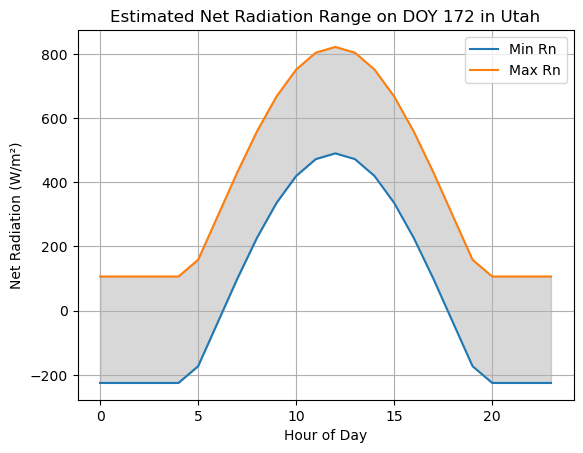

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from math import sin, cos, radians, pi, asin

# Constants
SOLAR_CONSTANT = 1367  # W/m²
ALBEDO = 0.25          # average for natural terrain
EMISSIVITY = 0.98      # ground emissivity
STEFAN_BOLTZMANN = 5.67e-8  # W/m²/K⁴
LATITUDE = 39.5  # Utah average latitude in degrees

def solar_declination(doy):
    """Return solar declination angle in radians for a given day of year."""
    return radians(23.44) * sin(2 * pi * (284 + doy) / 365)

def hour_angle(hour):
    """Return hour angle in radians."""
    return radians(15 * (hour - 12))

def solar_elevation(doy, hour, latitude=LATITUDE):
    """Return solar elevation angle in degrees."""
    decl = solar_declination(doy)
    lat_rad = radians(latitude)
    ha = hour_angle(hour)

    sin_elev = sin(lat_rad) * sin(decl) + cos(lat_rad) * cos(decl) * cos(ha)
    return max(0, asin(sin_elev))  # radians

def clear_sky_radiation(doy, hour, latitude=LATITUDE):
    """Estimate incoming shortwave radiation under clear-sky conditions."""
    elev_rad = solar_elevation(doy, hour, latitude)
    if elev_rad <= 0:
        return 0.0

    d_r = 1 + 0.033 * cos(2 * pi * doy / 365)  # Earth-Sun distance factor
    cos_zenith = cos(pi/2 - elev_rad)
    rs = SOLAR_CONSTANT * d_r * cos_zenith * 0.75  # ~0.75 = clear sky transmissivity
    return rs

def longwave_radiation(T_kelvin):
    """Estimate longwave radiation using Stefan-Boltzmann law."""
    return EMISSIVITY * STEFAN_BOLTZMANN * T_kelvin**4

def estimate_net_radiation_range(doy, hour):
    """Estimate min/max net radiation for given hour and DOY in Utah."""
    rs_down = clear_sky_radiation(doy, hour)

    # Net shortwave
    rs_net = rs_down * (1 - ALBEDO)

    # Assume typical diurnal surface temperature range in K
    Tmin_K = 273.15 + 5   # typical min in early morning
    Tmax_K = 273.15 + 40  # hot afternoon summer temp

    # Incoming longwave (simplified as ~cloudless sky)
    lw_down_min = longwave_radiation(Tmin_K - 5)  # colder sky at night
    lw_down_max = longwave_radiation(Tmax_K - 15) # warmer sky in afternoon

    # Outgoing longwave from surface
    lw_up_min = longwave_radiation(Tmin_K)
    lw_up_max = longwave_radiation(Tmax_K)

    # Net radiation range
    Rn_min = rs_net + lw_down_min - lw_up_max
    Rn_max = rs_net + lw_down_max - lw_up_min

    return Rn_min, Rn_max

# Example usage
doy = 172  # summer solstice ~June 21
hour = 14  # 2 PM

Rn_min, Rn_max = estimate_net_radiation_range(doy, hour)
print(f"DOY: {doy}, Hour: {hour}")
print(f"Estimated Net Radiation Range: {Rn_min:.1f} W/m² to {Rn_max:.1f} W/m²")

# Optional: Plotting diurnal range
hours = np.arange(0, 24)
rn_min_list, rn_max_list = zip(*[estimate_net_radiation_range(doy, h) for h in hours])

plt.plot(hours, rn_min_list, label="Min Rn")
plt.plot(hours, rn_max_list, label="Max Rn")
plt.fill_between(hours, rn_min_list, rn_max_list, color='gray', alpha=0.3)
plt.title(f"Estimated Net Radiation Range on DOY {doy} in Utah")
plt.xlabel("Hour of Day")
plt.ylabel("Net Radiation (W/m²)")
plt.legend()
plt.grid(True)
plt.show()


In [29]:
config_path = '../../station_config/US-UTP.ini'
d = Data(config_path)
q = QaQc(d)

Converting vpd from hpa to kpa
Calculating vapor pressure from vapor pressure deficit and air temperature
Calculating dew point temperature from vapor pressure

The input data temporal frequency appears to be less than daily.
Data is being resampled to daily temporal frequency.
Linearly interpolating gaps in energy balance components up to 4 hours when Rn < 0 and up to 2 hours when Rn >= 0.
Filtering days with less then 100.0% or 48/48 sub-daily measurements


C:\Users\paulinkenbrandt\Anaconda3\envs\pygis12\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [30]:
q.monthly_df


Missing one or more energy balance variables, cannot perform energy balance correction.
gridMET reference ET already downloaded for station at:
C:\Users\paulinkenbrandt\Documents\GitHub\MicroMet\Notebooks\Processing Workflow Notebooks\..\..\station_config\gridMET_data\US-UTP_41.0667N_-112.1000W.csv
not redownloading.
Gap filling ET with filtered ETrF x ETr (gridMET)


,VPD,es,T_SONIC,ETrF_filtered,vp,SWC_2_1_1,input_H,LW_IN,rso,ETrF,...,ET_gap,H_subday_gaps,Rn_subday_gaps,gridMET_ETr,ET,gridMET_prcp,LE_subday_gaps,ET_fill_val,gridMET_ETo,ET_fill
date,,,,,,,,,,,,,,,,,,,,,
2024-07-31,2.246626,3.411249,25.387152,0.668752,1.164624,NaN,-33.520969,NaN,362.806599,0.667269,...,1.033333,62.0,1488.0,317.646667,210.293642,3.616667,9.62069,NaN,235.703333,211.971038
2024-08-31,NaN,NaN,NaN,0.588538,NaN,NaN,NaN,NaN,322.800418,NaN,...,19.000000,836.0,1307.0,309.700000,182.287986,33.100000,820.00000,NaN,219.100000,182.728793
2024-09-30,NaN,NaN,NaN,0.508658,NaN,NaN,NaN,NaN,261.155497,NaN,...,13.000000,608.0,777.0,229.300000,113.735179,15.400000,596.00000,NaN,157.800000,115.634882
2024-10-31,NaN,NaN,NaN,0.367017,NaN,NaN,NaN,NaN,192.909854,NaN,...,8.000000,377.0,334.0,161.900000,59.412964,14.200000,359.00000,NaN,106.600000,58.526140
2024-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
d.df
d.inv_map

{'TIMESTAMP_START': 'date',
 'NETRAD': 'Rn',
 'input_LE': 'LE',
 'input_H': 'H',
 'SW_IN': 'sw_in',
 'SW_OUT': 'sw_out',
 'LW_IN': 'lw_in',
 'LW_OUT': 'lw_out',
 'RH_1_1_1': 'rh',
 'VPD': 'vpd',
 'T_SONIC': 't_avg',
 'WD': 'wd',
 'WS': 'ws',
 'SWC_2_1_1': 'theta_2'}

In [25]:
# convert to internal names, copy dataframe
df = d.df.rename(columns=d.inv_map)
# day of year mean of input energy balance components
vars_we_want = ['H', 'LE', 'Rn']
doy_means = df[vars_we_want].groupby(d.df.index.dayofyear).mean()
# create a Bokeh figure
fig = figure(x_axis_label='day of year', y_axis_label='day of year mean (w/m2)')
# arguements needed for creating interactive plots
plt_vars = vars_we_want
colors = ['red', 'blue', 'black', 'green']
x_name = 'date'
source = ColumnDataSource(doy_means)
Plot.add_lines(fig, doy_means, plt_vars, colors, x_name, source, labels=vars_we_want,
    x_axis_type=None)
show(fig)

In [2]:
station = 'US-UTP'
startdate = '2020-01-01'

headdict = {'Accept-Profile': 'groundwater','Content-Type': 'application/json'}

params = {'stationid':f'eq.{station}',
         'datetime_start':f'gte.{startdate}'
         }

resp_ed = requests.get("https://ugs-koop-umfdxaxiyq-wm.a.run.app/amfluxeddy",headers=headdict,params=params)
resp_met = requests.get("https://ugs-koop-umfdxaxiyq-wm.a.run.app/amfluxmet",headers=headdict,params=params)

In [11]:
resp_met

<Response [200]>

In [3]:
data_ed = pd.DataFrame(resp_ed.json())
data_met = pd.DataFrame(resp_met.json())

if len(data_ed) > 0:
    data_ed['datetime_start'] = pd.to_datetime(data_ed['datetime_start'])
    data_ed = data_ed.set_index(['stationid','datetime_start'])

if len(data_met) > 0:
    data_met['datetime_start'] = pd.to_datetime(data_met['datetime_start'])
    data_met = data_met.set_index(['stationid','datetime_start'])

if len(data_ed) > 0 and len(data_met) > 0:
    all_data = pd.concat([data_ed,data_met],axis=1)

In [4]:
data_ed.replace(-9999,np.nan,inplace=True)

timestamp_start  timestamp_end        co2  \
stationid datetime_start                                                   
US-UTP    2023-01-26 17:00:00     202301261700   202301261730 -9999.0000   
          2023-01-26 17:30:00     202301261730   202301261800   406.2625   
          2023-01-26 18:00:00     202301261800   202301261830   406.2360   
          2023-01-26 18:30:00     202301261830   202301261900   406.8281   
          2023-01-26 19:00:00     202301261900   202301261930   408.2220   
...                                        ...            ...        ...   
          2024-11-01 03:30:00     202411010330   202411010400 -9999.0000   
          2024-11-01 04:00:00     202411010400   202411010430 -9999.0000   
          2024-11-01 04:30:00     202411010430   202411010500 -9999.0000   
          2024-11-01 05:00:00     202411010500   202411010530 -9999.0000   
          2024-11-01 05:30:00     202411010530   202411010600 -9999.0000   

                                 co2_sigma          h2o    h2o_sigma  \
stationid datetime_start                                               
US-UTP    2023-01-26 17:00:00 -9999.000000 -9999.000000 -9999.000000   
          2023-01-26 17:30:00     0.626717     3.538518     0.061771   
          2023-01-26 18:00:00     0.335480     3.644652     0.053017   
          2023-01-26 18:30:00     0.611918     3.665830     0.042666   
          2023-01-26 19:00:00     0.431019     3.696614     0.044724   
...                                    ...          ...          ...   
          2024-11-01 03:30:00 -9999.000000 -9999.000000 -9999.000000   
          2024-11-01 04:00:00 -9999.000000 -9999.000000 -9999.000000   
          2024-11-01 04:30:00 -9999.000000 -9999.000000 -9999.000000   
          2024-11-01 05:00:00 -9999.000000 -9999.000000 -9999.000000   
          2024-11-01 05:30:00 -9999.000000 -9999.000000 -9999.000000   

                                        fc  fc_ssitc_test           le  \
stationid datetime_start                                                 
US-UTP    2023-01-26 17:00:00 -9999.000000          -9999 -9999.000000   
          2023-01-26 17:30:00     0.332273              1 -9999.000000   
          2023-01-26 18:00:00     0.323838              1 -9999.000000   
          2023-01-26 18:30:00     0.274951              1 -9999.000000   
          2023-01-26 19:00:00     0.383618          -9999     2.952237   
...                                    ...            ...          ...   
          2024-11-01 03:30:00 -9999.000000          -9999 -9999.000000   
          2024-11-01 04:00:00 -9999.000000          -9999 -9999.000000   
          2024-11-01 04:30:00 -9999.000000          -9999 -9999.000000   
          2024-11-01 05:00:00 -9999.000000          -9999 -9999.000000   
          2024-11-01 05:30:00 -9999.000000          -9999 -9999.000000   

                               le_ssitc_test  ...  rh_1_3_1  t_dp_1_3_1  \
stationid datetime_start                      ...                         
US-UTP    2023-01-26 17:00:00          -9999  ...   -9999.0  -9999.0000   
          2023-01-26 17:30:00              1  ...   -9999.0  -9999.0000   
          2023-01-26 18:00:00              1  ...   -9999.0  -9999.0000   
          2023-01-26 18:30:00              1  ...   -9999.0  -9999.0000   
          2023-01-26 19:00:00          -9999  ...   -9999.0  -9999.0000   
...                                      ...  ...       ...         ...   
          2024-11-01 03:30:00          -9999  ...   -9999.0   -109.1214   
          2024-11-01 04:00:00          -9999  ...   -9999.0   -109.4099   
          2024-11-01 04:30:00          -9999  ...   -9999.0   -110.7138   
          2024-11-01 05:00:00          -9999  ...   -9999.0   -112.3313   
          2024-11-01 05:30:00          -9999  ...   -9999.0   -111.6402   

                               ta_1_4_1     pblh_f     ts_2_1_1   swc_2_1_1  \
stationid datetime_start                                                      
US-UTP  

<Axes: xlabel='datetime_start'>

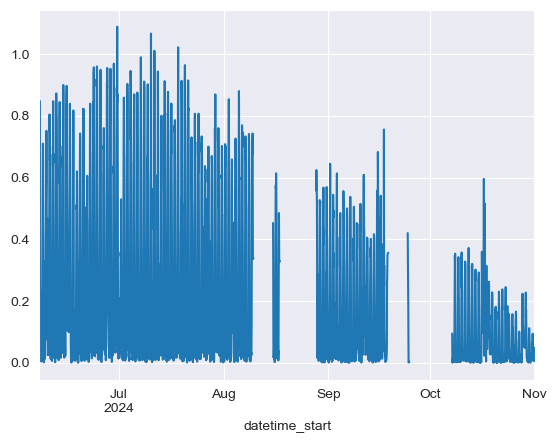

In [16]:
sql = "SELECT * FROM groundwater.amfluxeddy WHERE stationid = 'US-UTP' and datetime_start >= '2024-06-07 9:00'"
data = pd.read_sql(sql,engine)
data.replace(-9999,np.nan,inplace=True)
data.set_index('datetime_start',inplace=True)
#data = data.loc[pd.to_datetime('2024-06-07 9:00'):]

# Replace values in column 'A' below 0 with NaN
data['et'] = np.where(data['et'] < 0, np.nan, data['et'])
hrly = data.resample('1h').mean(numeric_only=True)
hrly = hrly.interpolate(method='time',limit=4)
# Compute daily cumulative sum
hrly['et_cumsum'] = hrly.groupby(hrly.index.date)['et'].cumsum()

hrly['et'].plot()

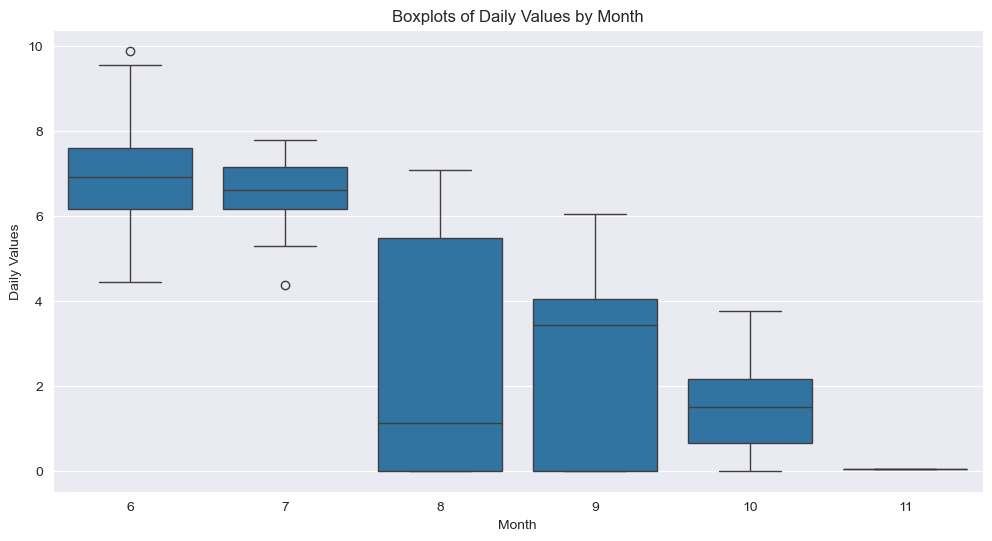

In [17]:
# Compute daily cumulative sum
dlyet = hrly.groupby(pd.Grouper(level=0,freq='D'))['et'].sum().to_frame()
dlyet['month'] = dlyet.index.month
import seaborn as sns
# Plot boxplots by month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='et', data=dlyet)
plt.title('Boxplots of Daily Values by Month')
plt.xlabel('Month')
plt.ylabel('Daily Values')
#plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


In [46]:
6*30*0.0393701

7.086618

In [28]:
stat_config = configparser.ConfigParser()
stat_config.read('../../station_config/US-UTP.ini')

latitude = stat_config['METADATA']['station_latitude']
longitude = stat_config['METADATA']['station_longitude']

crs = 4326

import pygridmet as gridmet
coords = (longitude, latitude)
dates = ("2024-06-07", "2024-12-27")

var = ['sph', 'srad', 'etr', 'pet', 'vs', 'tmmx', 'tmmn', 'vpd']

gridmet_data = gridmet.get_bycoords(coords, dates, variables=var, crs=crs)

<table class="table">
<thead>
<tr class="row-odd"><th class="head"><p>Variable</p></th>
<th class="head"><p>Abbr</p></th>
<th class="head"><p>Unit</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>Precipitation</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">pr</span></code></p></td>
<td><p>mm</p></td>
</tr>
<tr class="row-odd"><td><p>Maximum Relative Humidity</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">rmax</span></code></p></td>
<td><p>%</p></td>
</tr>
<tr class="row-even"><td><p>Minimum Relative Humidity</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">rmin</span></code></p></td>
<td><p>%</p></td>
</tr>
<tr class="row-odd"><td><p>Specific Humidity</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">sph</span></code></p></td>
<td><p>kg/kg</p></td>
</tr>
<tr class="row-even"><td><p>Surface Radiation</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">srad</span></code></p></td>
<td><p>W/m2</p></td>
</tr>
<tr class="row-odd"><td><p>Wind Direction</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">th</span></code></p></td>
<td><p>Degrees Clockwise from north</p></td>
</tr>
<tr class="row-even"><td><p>Minimum Air Temperature</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">tmmn</span></code></p></td>
<td><p>K</p></td>
</tr>
<tr class="row-odd"><td><p>Maximum Air Temperature</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">tmmx</span></code></p></td>
<td><p>K</p></td>
</tr>
<tr class="row-even"><td><p>Wind Speed</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">vs</span></code></p></td>
<td><p>m/s</p></td>
</tr>
<tr class="row-odd"><td><p>Burning Index</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">bi</span></code></p></td>
<td><p>Dimensionless</p></td>
</tr>
<tr class="row-even"><td><p>Fuel Moisture (100-hr)</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">fm100</span></code></p></td>
<td><p>%</p></td>
</tr>
<tr class="row-odd"><td><p>Fuel Moisture (1000-hr)</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">fm1000</span></code></p></td>
<td><p>%</p></td>
</tr>
<tr class="row-even"><td><p>Energy Release Component</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">erc</span></code></p></td>
<td><p>Dimensionless</p></td>
</tr>
<tr class="row-odd"><td><p>Reference Evapotranspiration (Alfalfa)</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">etr</span></code></p></td>
<td><p>mm</p></td>
</tr>
<tr class="row-even"><td><p>Reference Evapotranspiration (Grass)</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">pet</span></code></p></td>
<td><p>mm</p></td>
</tr>
<tr class="row-odd"><td><p>Vapor Pressure Deficit</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">vpd</span></code></p></td>
<td><p>kPa</p></td>
</tr>
</tbody>
</table>

In [29]:
data

,sph (kg/kg),srad (W/m2),etr (mm),pet (mm),vs (m/s),tmmx (K),tmmn (K),vpd (kPa)
time,,,,,,,,
2024-06-07,902.0,3114.0,78.0,63.0,21.0,853.0,797.0,207.0
2024-06-08,797.0,3293.0,80.0,65.0,19.0,858.0,791.0,225.0
2024-06-09,868.0,3117.0,101.0,75.0,32.0,883.0,794.0,254.0
2024-06-10,857.0,3275.0,87.0,67.0,32.0,834.0,772.0,175.0
2024-06-11,713.0,3322.0,82.0,65.0,20.0,859.0,770.0,227.0
...,...,...,...,...,...,...,...,...
2024-12-23,407.0,318.0,12.0,8.0,26.0,610.0,616.0,23.0
2024-12-24,368.0,845.0,20.0,12.0,41.0,610.0,635.0,32.0
2024-12-25,433.0,406.0,8.0,6.0,36.0,571.0,632.0,10.0


In [ ]:
data_ed.loc[station,'co2'].replace(-9999,np.nan).plot()

In [ ]:
imp_mean = IterativeImputer(random_state=0, max_iter=30, missing_values=np.nan,
                            sample_posterior=True,n_nearest_features=100,)
imp_mean.fit(data)
#X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
new_utd = pd.DataFrame(imp_mean.transform(data), columns=data.columns)
data['imp_LE'] = new_utd['LE']

* footprint
* import opentet

* Import remote sensing data to impute
